### Option Price ($K_1$ & $K_2$) using Analytical formula (B&S) 

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

def ana_option_price(K1,K2,S,T,t,sigma,r):

    g1 = (np.log(S/K2) + r-0.5*(sigma)**2)*(T-t)/(sigma*np.sqrt(T-t))
    g2 = g1 + (sigma*np.sqrt(T-t))
    
    
    
    d1 = (np.log(S/K1) + (r-0.5*(sigma)**2))*(T-t)/(sigma*np.sqrt(T-t))
    d2 = d1 + (sigma*np.sqrt(T-t))




    spread = K1*(1-norm.cdf(-g1)) + S*((norm.cdf(d1))-(norm.cdf(g1))) - K2*((norm.cdf(d2))-(norm.cdf(g2)))*np.exp(-r*(T-t))

    return spread

S0= 95
sigma = 0.25
r=0.03
T=1
K1=90
K2=100
K=90

ana_option_price(K1,K2,S0,T,0,sigma,r)

5.889947930166809

### Stock Path Simulations using Monte-Carlo 

The stock final price average from 1000 simulations is:98.69772259666941


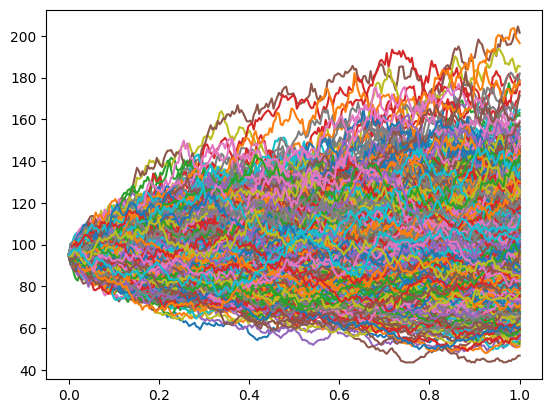

In [8]:
NMC = 1000
T = 1
Nt = 252
r=0.03
sigma=0.25
S0 = 95
K = 90
t = np.linspace(0,T,Nt)
dt = T/Nt
S = np.zeros([NMC,Nt])
S[:,0] = S0
for j in range(0, Nt-1):
    S[:,j+1] = S[:,j]*np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1, NMC))
ST = S[:, -1] 

print(f'The stock final price average from {NMC} simulations is:{np.mean(ST)}')

for i in range(0,NMC):
   plt.plot(t,S[i,:])
plt.show()

### Option Price ($K_1$ & $K_2$) using Monte-Carlo (B&S) 

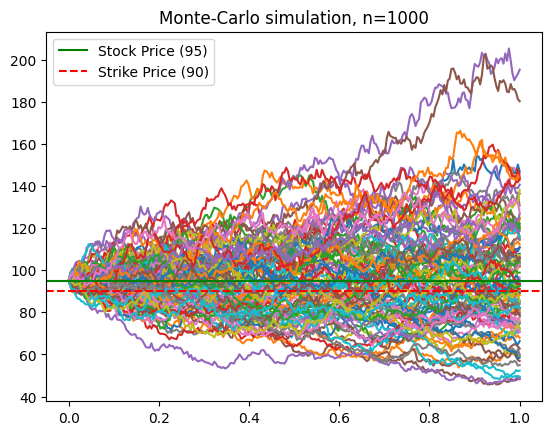

4.783029127893105

In [10]:
def option_MC(option_prices,T,dt,j,r):
    x = np.exp(-r*(T-j*dt))*np.mean(option_prices)
    return x

NMC = 100
Nt = 252
t = np.linspace(0,T,Nt)
dt = T/Nt

meana=[] # vector used for averaging on all the results, for better accuracy.

for l in range(100): # loop for 100 option prices that will be averaged

    S = np.zeros([NMC,Nt]) # array for stock prices
    S[:,0] = S0
    
    for j in range(0, Nt-1):
        S[:,j+1] = S[:,j]*np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1, NMC))

for i in range(0,NMC):
    plt.plot(t,S[i,:])
plt.axhline(S0, color='green', label='Stock Price (95)')
plt.axhline(K, color='red',linestyle = 'dashed', label='Strike Price (90)')
plt.legend()
plt.title('Monte-Carlo simulation, n=1000')
plt.show()

ST = S[:, -1]  # final price

option_prices = np.zeros(NMC)  # vector to store option prices
for i in range(NMC):
    if ST[i] >= K + 10:
        option_prices[i] = 10
    elif ST[i] <= K:
        option_prices[i] = 0
    else:
        option_prices[i] = ST[i] - K
        
meana.append(option_MC(option_prices,T,dt,0,r))
# end loop for all the option prices

np.mean(meana)

# Pricing of GMAB and GMDB

### Question 1

Analytical expressions of the GMAB at time t ≤ T:

 - using call options:

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd


def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    Parameters:
        S (float): Current price of the underlying asset
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate (annualized)
        sigma (float): Volatility of the underlying asset (annualized)
        option_type (str): Type of the option, either 'call' or 'put' (default is 'call')

    Returns:
        float: The Black-Scholes option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

       
    
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be either 'call' or 'put'")

    return option_price

# Example usage
S = 100     # Current price of the underlying asset
K = 110     # Strike price
T = 1       # Time to maturity (in years)
r = 0.05    # Risk-free interest rate (annualized)
sigma = 0.2 # Volatility of the underlying asset (annualized)

call_price = black_scholes(S, K, T, r, sigma, option_type='call')


print("Black-Scholes Call Price:", call_price)


Black-Scholes Call Price: 6.040088129724239


- using put opitions: 

In [2]:
# Example usage
S = 100     # Current price of the underlying asset
K = 110     # Strike price
T = 1       # Time to maturity (in years)
r = 0.05    # Risk-free interest rate (annualized)
sigma = 0.2 # Volatility of the underlying asset (annualized)

put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print("Black-Scholes Put Price:", put_price)

Black-Scholes Put Price: 10.675324824802793


### Question 2

Binomial tree to price a GMAB of maturity T=8 years

### Question 3

Analytical expressions of the GMDB at time t ≤ T:

- using call options:

- using put options:

### Question 4

Binomial tree to price a GMDB of maturity T=8 years

97.52703280679253

# Pricing of a maximum return insurance

In [27]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd

### Question 1

From the file "Data_project.xlsx": 

In [28]:
def import_excel(file_path):
    ''' Imports xlxs file in the provided path.'''
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
        
        # Check if the required columns are present
        required_columns = ['Date']
        if not all(column in df.columns for column in required_columns):
            raise ValueError("Required columns are missing in the Excel file.")
        return df

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
    except Exception as e:
        print("An error occurred:", e)

# Import .xlsx file containing date and indexes columns closing values. Example ['Date', "Eurxx50", "Amex"] 
file_path = "/mnt/c/buildbr/finance-stochastic-24/data/Data_project.xlsx" 
data = import_excel(file_path)

In [29]:
def calculate_daily_return(df):
    ''' Calculate the returns, avg, and std for each index-column.'''

    avg_return_idx = []
    std_return_idx = []

    cols = df.columns[1:]

    [col for col in df.columns if 'return' in col]
    for col in cols:
        df[f'return_{col}'] = df[col].pct_change()
        avg_return_idx.append(df[f'return_{col}'].mean())
        std_return_idx.append(df[f'return_{col}'].std())

    return cols, avg_return_idx, std_return_idx

def calculate_returns_corr(df):
    ''' Calculate the return correlation of the indexes.'''

    return_columns = [col for col in df.columns if 'return' in col]
    df_return = df[return_columns]
    return_corr_matrix = df_return.corr()

    correlation = df['return_Amex'].corr(df['return_Eurxx50'])
    cov_matrix = df[return_columns].cov()
    
    return return_corr_matrix, correlation, cov_matrix

if data is not None:
    # Calculate returns
    indexes, avg_returns, std_returns = calculate_daily_return(data)
    # Calculate returns correlation
    corr_matrix, correlation, cov_matrix = calculate_returns_corr(data) # check with slides

- Daily returns of each indice

In [33]:
print(data)


          Date      Eurxx50         Amex  return_Eurxx50  return_Amex
0   2022-02-07  4120.560059  3735.790039             NaN          NaN
1   2022-02-08  4129.250000  3711.939941        0.002109    -0.006384
2   2022-02-09  4204.089844  3733.330078        0.018124     0.005763
3   2022-02-10  4197.069824  3713.290039       -0.001670    -0.005368
4   2022-02-11  4155.229980  3810.250000       -0.009969     0.026112
..         ...          ...          ...             ...          ...
498 2024-01-29  4639.359863  4522.080078        0.000839    -0.002262
499 2024-01-30  4662.700195  4573.000000        0.005031     0.011260
500 2024-01-31  4648.399902  4499.319824       -0.003067    -0.016112
501 2024-02-01  4638.600098  4486.240234       -0.002108    -0.002907
502 2024-02-02  4654.549805  4443.890137        0.003438    -0.009440

[503 rows x 5 columns]


- Averages, standard deviations and correlation of daily returns.

In [37]:
for idx, col in enumerate(indexes):
        print(f'The daiy return average and std deviaton for the {col} are: {round(avg_returns[idx]*100,3)}% and {round(std_returns[idx],3)}')
print(f'The correlation is rho : {round(correlation,3)}')
print(f'The covariance matrix M:')
print(cov_matrix)
print(f'The Choleski decomposition of M:')
np.linalg.cholesky(cov_matrix)

The daiy return average and std deviaton for the Eurxx50 are: 0.032% and 0.012
The daiy return average and std deviaton for the Amex are: 0.046% and 0.015
The correlation is rho : 0.306
The covariance matrix M:
                return_Eurxx50  return_Amex
return_Eurxx50        0.000147     0.000057
return_Amex           0.000057     0.000236
The Choleski decomposition of M:


array([[0.01210911, 0.        ],
       [0.00470035, 0.01462035]])

- Calculate the annual standard deviations, annual returns and covariance
matrix.

In [38]:
for idx, col in enumerate(indexes):
        print(f'The annual return average and std deviaton for the {col} are: {round(avg_returns[idx]*252*100,3)}% and {round(std_returns[idx]* np.sqrt(252),3)}')

The annual return average and std deviaton for the Eurxx50 are: 7.959% and 0.192
The annual return average and std deviaton for the Amex are: 11.686% and 0.244


$$
\text{Cov}(X,Y) = 
\begin{bmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_1 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \\
\end{bmatrix}
$$


In [37]:

cov_matrix_Y = np.array([[round(std_returns[0]* np.sqrt(252),3)**2, round(std_returns[0]* np.sqrt(252),3)*round(std_returns[1]* np.sqrt(252),3)*correlation],
                           [round(std_returns[0]* np.sqrt(252),3)*round(std_returns[1]* np.sqrt(252),3)*correlation, round(std_returns[1]* np.sqrt(252),3)**2]])
print(f'The annualized covariance matrix M:')
print(cov_matrix_Y)


The annualized covariance matrix M:
[[0.036864   0.01433856]
 [0.01433856 0.059536  ]]


$$
\text{$\Sigma$} = 
\begin{bmatrix}
\sigma_1 & 0 \\
\rho \sigma_2  & \sqrt{1 -\rho} \sigma_2 \\
\end{bmatrix}
$$

In [38]:
print(f'The annualized Choleski decomposition of M:')
Cholesky = np.linalg.cholesky(cov_matrix_Y)
print(Cholesky)

The annualized Choleski decomposition of M:
[[0.192      0.        ]
 [0.07468    0.23229055]]


### Question 2
The interest rate is equal r = 3.75% and the maturity is T. Using the parameters estimated from Q1, evaluate the maximum return insurance with a
closed form expression (present and brifly comment it) for T = 1, 2, ...10 years (t = 0).

1 16553
2 17190
3 17675
4 18080
5 18434
6 18751
7 19040
8 19307
9 19556
10 19789


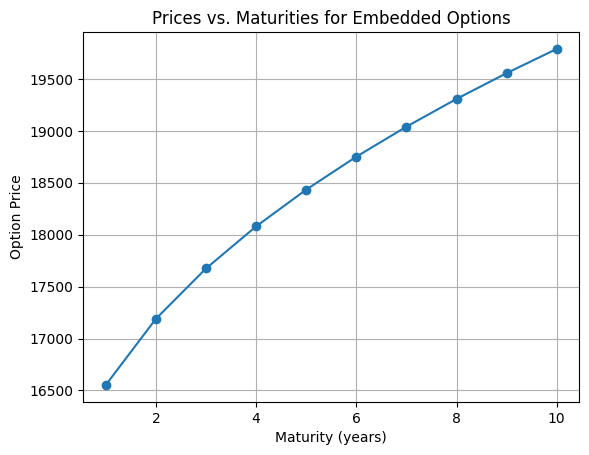

In [43]:
def embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, choleski):
    """
    Calculate the Black-Scholes option price with an embedded max return feature in a closed form.

    Parameters:
        S1 (float): Current price of the first underlying asset
        S2 (float): Current price of the second underlying asset
        T (float): Time to maturity (in years)
        choleski: The Cholesky decomposition of the covariance matrix 

    Returns:
        float: The Black-Scholes option price with an embedded max return feature
    """
  
    # Calculate the parameters for the log-normal distribution (slide 191)
    ut = -(choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T/2
    vt = np.sqrt((choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T)
    # Black-Scholes parameters with max return feature
    d2 = (np.log(S1 / S2) - ut)/vt
    d1 = d2 - vt

    # Analytical formula for the option price 
    option_price = S2 * norm.cdf(-d1) - S1 * norm.cdf(-d2) + S1 * np.exp(-r * t)

    return option_price

Maturities = range(1,11) 

# # Example slide 192
# S1 = 100     # Current price of the first underlying asset
# S2 = 100     # Current price of the second underlying asset
# r = 0.04
# t= 0
# cho =  np.array([[0.25, 0],
#                    [0, 0.3]])

# Project exercise 2
S1 = 15000   # Current price of the first underlying asset
S2 = 15000   # Current price of the second underlying asset
r = 0.0375
t= 0
cho =  Cholesky
option_prices = []
for T in Maturities:
    option_price_t = embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, cho)
    option_prices.append(option_price_t)
    print(T, round(option_price_t))

# Plotting
plt.plot(Maturities, option_prices, marker='o')
plt.title('Prices vs. Maturities for Embedded Options')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

### Question 3
Price the contract by Monte-Carlo simulations for T = 1, 2, ...10 years. Compare your results with those obtained with the closed-form expression. Test different steps of time and check the convergence.

In [44]:
def simulate_asset_path(S1, S2, r, sigma, T, m, p, choleski):
    """
    Simulate paths of S_t under the risk-neutral measure Q.

    Parameters:
        S0 (float): Initial price of the asset
        r (float): Risk-free interest rate
        sigma (float): Volatility of the asset
        T (float): Time to maturity (in years)
        m (int): Number of time steps
        p (int): Number of simulations
        choleski: The Cholesky decomposition of the covariance matrix 

    Returns:
        numpy.ndarray: Matrix of simulated paths with shape (m+1, p)
    """

    dt = T / m # time steps
    S1_paths, S2_paths = np.zeros((m+1, p)), np.zeros((m+1, p))

    # Pay-off simulation


    # Paths for S1
    S1_paths[0, :] = S1 # All the simulation stepd 0 assume So 
    for j in range(1, m+1):
        DeltaSJ = r * S1_paths[j-1] * dt + sigma * S1_paths[j-1] * np.sqrt(dt) * np.random.normal(size=p)
        S1_paths[j, :] = S1_paths[j-1] + DeltaSJ


    S1_T = np.mean(paths[-1, :]) # m, the last term


    # Paths for S2
    S2_paths[0, :] = S2 # All the simulation stepd 0 assume So 
    for j in range(1, m+1):
        DeltaSJ = r * S2_paths[j-1] * dt + sigma * S2_paths[j-1] * np.sqrt(dt) * np.random.normal(size=p)
        S2_paths[j, :] = S2_paths[j-1] + DeltaSJ


    Delta_S_paths = np.mean(paths[-1, :]) # substract the m-th (the last term) of the "p" paths simulations

    Delta_S = np.mean(Delta_S_paths[-1, :])

    Vo = Delta_S*np.exp(-r*T)/p

    return Vo

# Parameters
S0 = 1500      # Initial price of the asset
r = 0.0375      # Risk-free interest rate
sigma = 0.3   # Volatility of the asset
T = 1         # Time to maturity (in years)
m = 100       # Number of time steps
p = 1000      # Number of simulations

choleski = Cholesky

# Simulate paths
paths = simulate_asset_path(S0, r, sigma, T, m, p, choleski)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(p):
    plt.plot(np.linspace(0, T, m+1), paths[:, i])
plt.title('Simulated Paths of S_t under Q')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.grid(True)
plt.show()

NameError: name 'simulate_paths' is not defined

In [59]:
import numpy as np

def simulate_asset_paths(num_simulations, num_assets, initial_prices, drifts, volatilities, correlation_matrix, num_time_steps, time_horizon, interest_rate):
    payoffs = []

    for _ in range(num_simulations):
        asset_paths = np.zeros((num_assets, num_time_steps + 1))
        asset_paths[:, 0] = initial_prices

        dt = time_horizon / num_time_steps
        cholesky_factor = np.linalg.cholesky(correlation_matrix)

        for t in range(num_time_steps):
            random_shocks = np.random.randn(num_assets)
            correlated_shocks = np.dot(cholesky_factor, random_shocks)

            for i in range(num_assets):
                drift = drifts[i] * dt
                volatility = volatilities[i] * np.sqrt(dt)
                
                asset_paths[i, t + 1] = asset_paths[i, t] * np.exp(drift + volatility * correlated_shocks[i])

        payoff = asset_paths[0, -1] - asset_paths[1, -1]  # Calculate payoff
        discounted_payoff = payoff * np.exp(-interest_rate * time_horizon)  # Discount payoff
        payoffs.append(discounted_payoff)  # Store discounted payoff

    average_payoff = np.mean(payoffs)  # Calculate average payoff
    return average_payoff

# Example parameters
num_simulations = 1000
num_assets = 2
initial_prices = np.array([100, 100])
drifts = np.array([0.05, 0.03])
volatilities = np.array([0.2, 0.15])
correlation_matrix = np.array([[1.0, 0.5], [0.5, 1.0]])
num_time_steps = 1000
time_horizon = 1  # in years
interest_rate = 0.05  # Interest rate

# Simulate asset paths and calculate average payoff
average_payoff = simulate_asset_paths(num_simulations, num_assets, initial_prices, drifts, volatilities, correlation_matrix, num_time_steps, time_horizon, interest_rate)

print("Average payoff:", average_payoff)


Payoff before discounting: 4.976641527949125e+44
Discounted Payoff: 4.733927856577401e+44


In [ ]:
def ana_option_price(K1,K2,S,T,t,sigma,r):

    g1 = (np.log(S/K2) + r-0.5*(sigma)**2)*(T-t)/(sigma*np.sqrt(T-t))
    g2 = g1 + (sigma*np.sqrt(T-t))
    d1 = (np.log(S/K1) + (r-0.5*(sigma)**2))*(T-t)/(sigma*np.sqrt(T-t))
    d2 = d1 + (sigma*np.sqrt(T-t))

    spread = 10*(1-norm.cdf(-g1)) + S*((norm.cdf(d1))-(norm.cdf(g1))) - K1*((norm.cdf(d2))-(norm.cdf(g2)))*np.exp(-r*(T-t))

    return spread

In [11]:
print("Average Price:", np.mean(paths[-1, :]))

Average Price: 102.80568533055792


### Question 4
We assume that in case of death before expiry, the inheritor will receive the maximum between the initial premium (15 000€) and the funds
tracking the Eurostoxx 50 and the AMEX. Evaluate this death insurance for T = 1, 2, ...10 years, using Monte-Carlo simulations. Test different steps of time and check the convergence.

## Extra

### PDE Implicit method

The value of alpha is 10.356693121127789


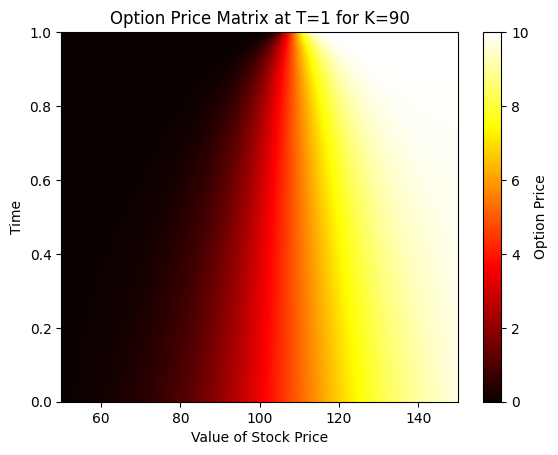

In [29]:
T =1
N = 200000

K=90
So = 95
upper_So = 150
lower_So = 50

M= 500

xmax = np.log(upper_So/So)
xmin = np.log(lower_So/So)


# the time step must be small than 1
dt = T/N
h = (xmax-xmin)/M
print('The value of alpha is',dt/h**2) # making sure we have the stability condition


# The constants for the equation
b = r*dt + 1 + dt*(sigma/h)**2
c = -r*dt/(2*h) - dt/(2*h)*(sigma**2)*(1/h-1/2)
a = c + (r-(sigma**2)/2)/h*dt


# Define the arrays for the stock price and time
x = np.linspace(xmin, xmax, M+1)
t = np.linspace(0, T, N+1)

# Define the initial and boundary conditions
V = np.zeros((N+1, M+1))
q=np.maximum(0,S0 * np.exp(x) - K)
V[N, :] = np.minimum(q, 10)

V[:, 0] = 0

for j in range(N+1):
    if S0*np.exp(xmax) >= K + 10:
        V[j,M] = 10* np.exp(-r*(T-j*dt))
    elif S0*np.exp(xmax) <= K:
        V[j,M] = 0
    else:
        V[j,M] = (S0*np.exp(xmax) - K)* np.exp(-r*(T-j*dt))

# Solve the equation using the explicit method

A = np.zeros((M-1, M-1))
for i in range(M-1):
    A[i, i] = b
    if i > 0:
        A[i, i-1] = a
    if i < M-2:
        A[i, i+1] = c

W = np.zeros((M-1)) # vector of boundary conditions

for i in range( N-1,-1,-1): # going backwards

    W[0] = -a * V[i,0]
    W[-1] = -c * V[i,-1]
    # Solve the matrix equation for V
    V[i,1:M] = np.dot(np.linalg.inv(A), V[i+1,1:M] + W)


# Plot the matrix
plt.imshow(V, origin='lower', extent=[50, 150, 0, 1], cmap='hot', aspect='auto')
plt.colorbar(label='Option Price')
plt.xlabel('Value of Stock Price')
plt.ylabel('Time')
plt.title(f'Option Price Matrix at T={T} for K={K}')
plt.show()

### PDE Explicit method

The value of alpha is 0.9552526361134334


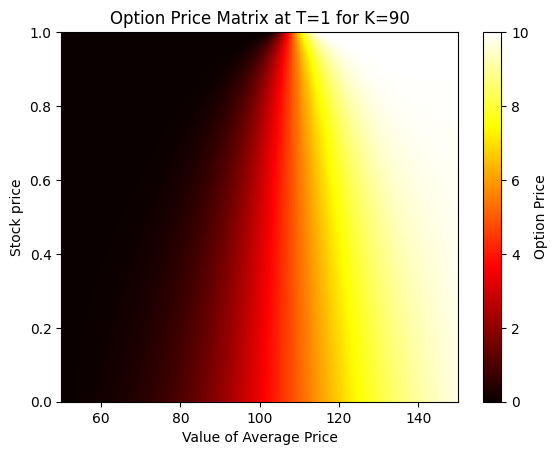

In [18]:
T =1
N = 200000

K=90
So = 95
upper_So = 150
lower_So = 50

M= 500

xmax = np.log(upper_So/So)
xmin = np.log(lower_So/So)


# Define the time and spatial step sizes
dt = T / N
h = (xmax - xmin) / M
print('The value of alpha is',dt/h**2) # making sure we have the stability condition

# Define the arrays for the stock price and time
x = np.linspace(xmin, xmax, M+1)
t = np.linspace(0, T, N+1)

# Define the initial and boundary conditions
V = np.zeros((N+1, M+1))
q=np.maximum(0,S0 * np.exp(x) - K)
V[N, :] = np.minimum(q, 10)
V[:, 0] = 0

for j in range(N+1):
    if S0*np.exp(xmax) >= K + 10:
        V[j,M] = 10* np.exp(-r*(T-j*dt))
    elif S0*np.exp(xmax) <= K:
        V[j,M] = 0
    else:
        V[j,M] = (S0*np.exp(xmax) - K)* np.exp(-r*(T-j*dt))
    # V[j,M] = 10

# Define the coefficients of the discretized equation

ce = ( 0.5 * r/h + (1/h - 1/2)* 0.5/h * sigma**2)*dt / (1+r*dt)
be = (1 -  dt * sigma**2/h**2) / (1+r*dt)
ae = (- 0.5 * r/h + (1/h + 1/2)* 0.5/h * sigma**2)*dt / (1+r*dt)

# Solve the equation using the explicit method
for i in range( N-1,-1,-1):

    for j in range(1, M):

        V[i, j] = ae*V[i+1, j-1] + be * (V[i+1, j]) + ce * (V[i+1, j+1] )

# for i in range(M+1):
#
#     plt.plot(t,V[:,i])
# plt.show()

# print("Option value at time 0: ", V[0, :])
# print("Option value at maturity T: ", V[N, :])
# Plot
plt.imshow(V, origin='lower', extent=[50, 150, 0, 1], cmap='hot', aspect='auto')
plt.colorbar(label='Option Price')
plt.xlabel('Value of Average Price')
plt.ylabel('Stock price')
plt.title(f'Option Price Matrix at T={T} for K={K}')
plt.show()

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt


### European Binomial tree (Slide 63)

In [24]:
def eur_payoff_probability_sum(n, p, So, u, d, k):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:
        n (int): Number of step.
        So (int): Initial stock price.
        u (float): potential increase of So.
        d (float): potential decrease of So.
        k (int): strike price of the option for payoff        

    Returns:
        float: Sum of probabilities for up to j successes.
    """
    call_sum_prob, put_sum_prob = 0, 0

    for j in range(n + 1):

        call_payoff_j = np.maximum(So*(u**j)*d**(n-j) - k, 0)

        put_payoff_j = np.maximum(k - So*(u**j)*d**(n-j), 0)

        prob_j = math.comb(n, j) * (p ** j) * ((1 - p) ** (n - j))
        
        call_sum_prob += prob_j*call_payoff_j

        put_sum_prob += prob_j*put_payoff_j

    return call_sum_prob, put_sum_prob

def binomial_tree(So, r, T, Nt, k, sigma):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:
        So (int): Initial stock price.
        r (float): risk free rate (Neutral Risk).
        T (int): Maturity.
        Nt (int): Number of step.

    Returns:
        F: option price at time zero.
    """

    step = T/Nt # Maturity divided by the number of step

    # how to choose u & d:
    u = np.exp((r-(sigma**2)/2)*step + sigma*np.sqrt(step))
    d = np.exp((r-(sigma**2)/2)*step - sigma*np.sqrt(step))

    # how to calculate p (for neutral risk Q):
    p = (np.exp(r*step)-d)/(u-d)

    C_prob, P_prob = eur_payoff_probability_sum(Nt, p, So, u, d, k)

    # option price at t=0
    Call =np.exp(-r*T)*C_prob
    Put =np.exp(-r*T)*P_prob

    return Call, Put


### American Binomial tree (Slide 65)

In [ ]:
def ame_payoff_probability_sum(n, p, So, u, d, k):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:
        n (int): Number of step.
        So (int): Initial stock price.
        u (float): potential increase of So.
        d (float): potential decrease of So.
        k (int): strike price of the option for payoff.   
    Returns:
        float: Sum of probabilities for up to j successes.
    """
    call_sum_prob, put_sum_prob = 0, 0

    step = T/Nt 

    for j in range(n + 1):

        Pcall_o = So
        Pput_o = So

        # current price payoff at next step
        Pcall_t = Pcall_o*(u**j)*d**(n-j) - k # fu
        Pput_t = k - Pput_o*(u**j)*d**(n-j) # fu

        current_price_call = np.maximum(Pcall_o, np.exp(-r*step)*(p*Pcall_t*u + (1-p)*Pcall_t*d))


        
        

        call_payoff_j = np.maximum(Pcall_t, 0)

        put_payoff_j = np.maximum(Pput_t, 0)

        prob_j = math.comb(n, j) * (p ** j) * ((1 - p) ** (n - j))
        
        call_sum_prob += prob_j*call_payoff_j

        put_sum_prob += prob_j*put_payoff_j

    return call_sum_prob, put_sum_prob

def ame_binomial_tree(So, r, T, Nt, k, sigma):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:
        So (int): Initial stock price.
        r (float): risk free rate (Neutral Risk).
        T (int): Maturity.
        Nt (int): Number of step.
    Returns:
        F: option price at time zero.
    """

    step = T/Nt # Maturity divided by the number of step

    # how to choose u & d:
    u = np.exp((r-(sigma**2)/2)*step + sigma*np.sqrt(step))
    d = np.exp((r-(sigma**2)/2)*step - sigma*np.sqrt(step))

    # how to calculate p (for neutral risk Q):
    p = (np.exp(r*step)-d)/(u-d)

    C_prob, P_prob = eur_payoff_probability_sum(Nt, p, So, u, d, k)

   

    
    

    Pcall_t = So*(u**j)*d**(n-j) - k
    Pput_t = k - So*(u**j)*d**(n-j)

    # option price at t=0
    Call = np.maximum(Pcall_t, np.exp(-r*step)*(p*fu + (1-p)fu))

    Put = np.maximum(Pput_t, np.exp(-r*step)*(p*fu + (1-p)fu))

    return Call, Put

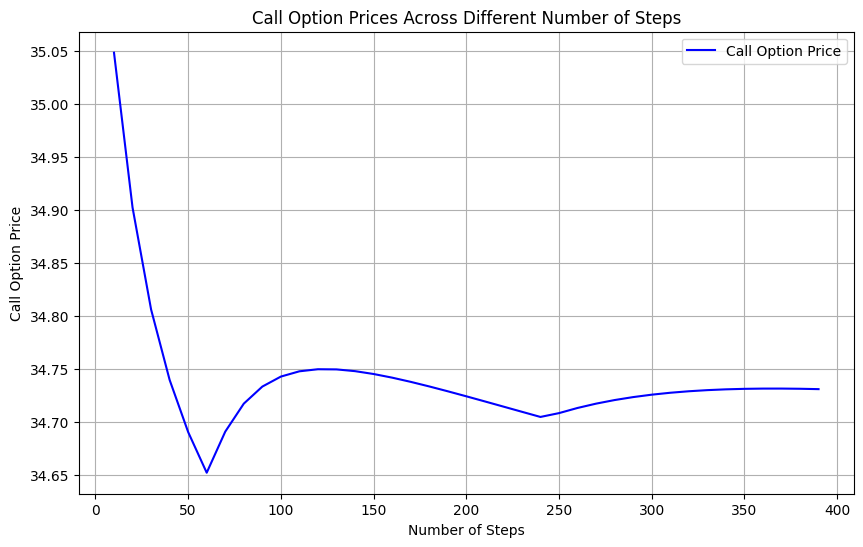

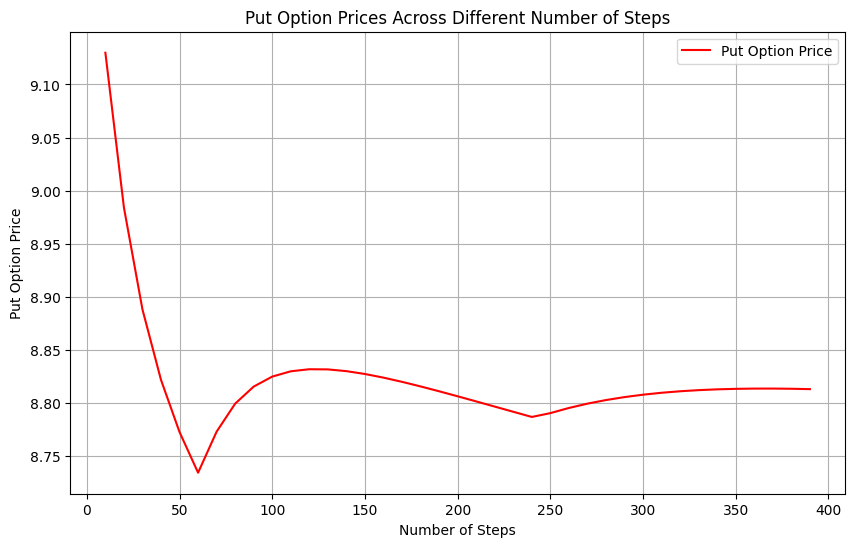

In [23]:
def plot_option_prices(So, r, T, k, sigma, Nt_values):
    call_prices = []
    put_prices = []

    for Nt in Nt_values:
        call_price, put_price = binomial_tree(So, r, T, Nt, k, sigma)
        call_prices.append(call_price)
        put_prices.append(put_price)

    # Plot Call Option Prices
    plt.figure(figsize=(10, 6))
    plt.plot(Nt_values, call_prices, label='Call Option Price', color='blue')
    plt.xlabel('Number of Steps')
    plt.ylabel('Call Option Price')
    plt.title('Call Option Prices Across Different Number of Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Put Option Prices
    plt.figure(figsize=(10, 6))
    plt.plot(Nt_values, put_prices, label='Put Option Price', color='red')
    plt.xlabel('Number of Steps')
    plt.ylabel('Put Option Price')
    plt.title('Put Option Prices Across Different Number of Steps')
    plt.legend()
    plt.grid(True)
    plt.show()


So = 100
r = 0.06
T = 5
Nt_values = range(10, 400, 10) # Varying number of steps
k = 100
sigma = 0.25

price = binomial_tree(So, r, T, Nt, k, sigma)

# Plot option prices
plot_option_prices(So, r, T, k, sigma, Nt_values)

In [ ]:
N=200

def binomial_tree_call(S, K, T, r, sigma, N):
    delta_t = T / N
    u = math.exp(sigma * math.sqrt(delta_t))
    d = 1 / u
    # u= 1.02
    # d=0.98
    p = (np.exp(r*delta_t) - d) / (u - d)

    stock_price = [0] * (N + 1)
    option_price = [0] * (N + 1)

    
    for i in range(N + 1):
        option_price[i] = np.minimum(10,np.maximum(0,S * u**( i) * d**(N-i)-K))
       # if (option_price[i] > K+10):
        #    option_price[i] = 10


    for j in range(N + 1):
        option_price[j] = math.comb(N,j)*(p**j) * ((1 - p)**(N-j)) * option_price[j]
    # En faisant attention à prendre le j-ème élément de la liste où il y a j augmentation

    F = sum(option_price)/(np.exp(r*T))
    return F

# Result
F = binomial_tree_call(S0, K, T, r, sigma, N)
print(F)

### Binomial tree for Bermudian

In [ ]:
def binomial_tree_ber_call(S, K, T, r, sigma, N):
    delta_t = T / N
    u = math.exp(sigma * math.sqrt(delta_t))
    d = 1 / u
    #u= 1.02
    #d=0.98
    p = (math.exp(r * delta_t) - d) / (u - d)
    dates = [ int(k*N/12) for k in range(1,13)]
    option_price = np.zeros((N+1,N+1))


    for i in range(N + 1):
        option_price[N,i] = np.maximum(0,S * u**( i) * d**(N-i)-K)
        if (option_price[N,i] > K+10):
            option_price[N,i] = 10

    for k in range(N - 1, -1, -1):
        for i in range(k + 1):
            if k in dates:

                payoff = np.minimum(10,np.maximum(0,S * u** (i) * d**(k-i)-K))

                option_price[k,i] = np.maximum(payoff, np.exp(-r*delta_t) * (p * option_price[k+1,i] + (1 - p) * option_price[k+1,i+1]))


            else:

                option_price[k,i] = np.exp(-r*delta_t) * (p * option_price[k+1,i] + (1 - p) * option_price[k+1,i+1])


    return option_price[0,0]

# Result
option_price = binomial_tree_ber_call(S0, K, T, r, sigma, N)
print(option_price)

# Comparison
dates = [ int(k*N/12) for k in range(1,13)]

option_ber=np.zeros((NMC,Nt))


for i in range(NMC):
    for l in dates:

        payoff = np.minimum(10,np.maximum(S[i,l-1]-90,0))
        ana= ana_option_price(K1,K2,S[i, l-1],l/Nt,0,sigma,r)
        option_ber[i,l-1]=np.maximum(ana, payoff)


np.mean(option_ber[:,-1])